In [20]:
import pandas
import numpy as np

In [21]:
titanic = pandas.read_csv('train.csv')

In [22]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [23]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1

In [25]:
titanic['Sex'].unique()

array([0, 1], dtype=int64)

In [26]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
titanic['Embarked'] = titanic['Embarked'].replace('nan', np.nan).fillna('S')
titanic.loc[titanic['Embarked'] == 'S', 'Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C', 'Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q', 'Embarked'] = 2

In [28]:
titanic['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [30]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [31]:
alg = LinearRegression()
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

In [34]:
predictions = []
for train, test  in kf:
    train_predictors = (titanic[predictors].iloc[train, :])
    train_target = titanic['Survived'].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test, :])
    predictions.append(test_predictions)
predictions = np.concatenate(predictions, axis=0)

In [35]:
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
accuracy = sum(predictions[predictions == titanic['Survived']])/len(predictions)
accuracy

0.2615039281705948

In [36]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [37]:
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)
scores.mean()

0.7878787878787877

In [38]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

In [39]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [40]:
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=kf)

scores.mean()

0.7856341189674523

In [41]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=kf)

scores.mean()

0.8159371492704826

In [42]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['NameLength'] = titanic['Name'].apply(lambda x: len(x))

In [43]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic['Name'].apply(get_title)
pandas.value_counts(titles)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Capt          1
Lady          1
Don           1
Ms            1
Mme           1
Countess      1
Jonkheer      1
Name: Name, dtype: int64

In [44]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 8, 'Mlle': 9, 'Capt': 10, 'Ms': 11, 'Jonkheer': 12, 'Don':13, 'Sir':14, 'Countess':15, 'Lady':16, 'Mme':17}
for k,v in title_mapping.items():
    titles[titles==k]=v
    
pandas.value_counts(titles)

1     517
2     182
3     125
4      40
5       7
6       6
8       2
7       2
9       2
16      1
10      1
11      1
12      1
13      1
14      1
15      1
17      1
Name: Name, dtype: int64

In [45]:
titanic['Title'] = titles

In [46]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
% matplotlib inline

In [47]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'NameLength']

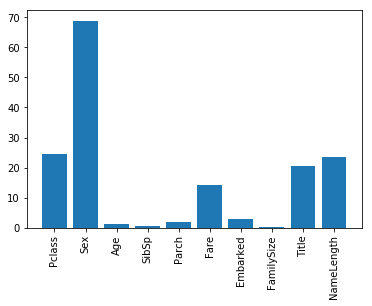

In [48]:
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic['Survived'])
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


In [49]:
predictors = ['Pclass', 'Sex', 'Fare', 'Title']
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=kf)

scores.mean()

0.8114478114478114

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [51]:
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'NameLength']],
    [LogisticRegression(random_state=1), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'NameLength']]
]

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)


In [52]:
predictions = []
for train, test  in kf:
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train, :], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test, :].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] * full_test_predictions[1])/2
    test_predictions[test_predictions <= 0.5] = 0
    test_predictions[test_predictions > 0.5] = 1
    predictions.append(test_predictions)


In [53]:
predictions = np.concatenate(predictions, axis=0)

In [54]:
accuracy = sum(predictions[predictions == titanic['Survived']])/len(predictions)
accuracy

0.0